# Data and Setup

In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df = pd.read_csv('911.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [8]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Basic Questions

**What are the top 5 zip codes for 911 calls?**

In [11]:
df['zip'].value_counts().head()

,count
zip,
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


**What are the top 5 townships (twp) for 911 calls?**

In [10]:
df['twp'].value_counts().head()

,count
twp,
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


**How many unique codes are there in the 'title' column?**

In [12]:
df['title'].nunique()

110

# Creating new features

We create a new column called 'reason', which indicates the reason for 911 calls. We get this by splitting the title column and selecting the abbreviation. Eg: In the first column, it says, "EMS: BACK PAINS/ INJURY". So for this particular column, we would run the following code to extract "EMS":


```
x = df['title'].iloc[0]
x.split(':')[0] # Selecting the first index when the string is split by ':'
```

Therefore, for the whole dataset, we create a lambda function to perform the same task and create a new column called 'reason' using this code:

```
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
```

**What is the most common reason for 911 calls based off of the new 'reason' column?**

In [18]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason']

,reason
0,EMS
1,EMS
2,Fire
3,EMS
4,EMS
...,...
99487,Traffic
99488,Traffic
99489,EMS
99490,EMS


In [20]:
df['reason'].value_counts()

,count
reason,
EMS,48877
Traffic,35695
Fire,14920


Using seaborn to create a countplot of 911 calls by 'reason'

<Axes: xlabel='reason', ylabel='count'>

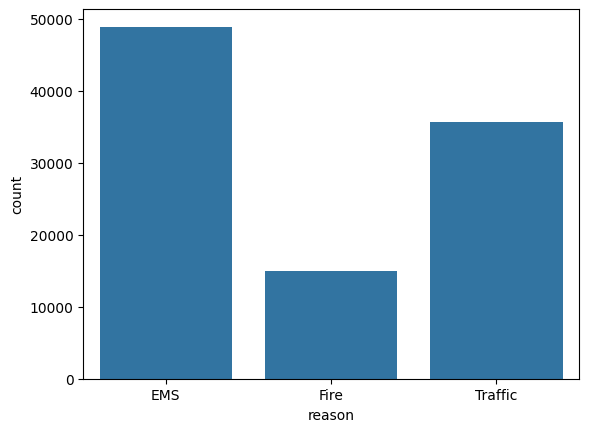

In [23]:
sns.countplot(x='reason', data=df)

**What is the data type of the objects in the timeStamp column?**

In [24]:
type(df['timeStamp'].iloc[0])

str

We need to convert this into a DateTime object.

In [27]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Making separate columns for 'hour', 'month', and 'day of week'.

In [28]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [29]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Mapping the day of week to its value ranging from 0-5

In [30]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [31]:
df['day of week'] = df['day of week'].map(dmap)

In [32]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Using seaborn to create a countplot of the Day of Week column with the hue based off of the reason column.

<Axes: xlabel='day of week', ylabel='count'>

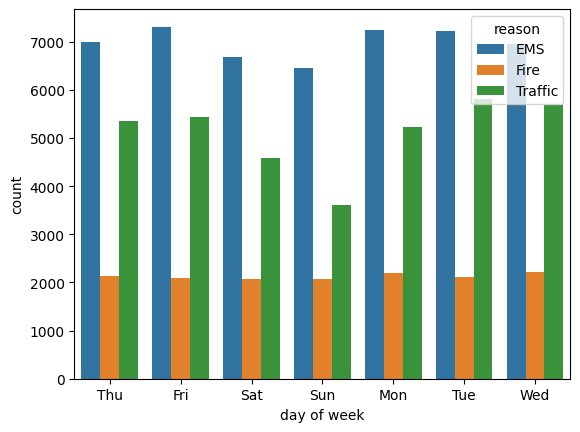

In [33]:
sns.countplot(x='day of week', data=df, hue='reason')

Doing the same for 'month'.

<Axes: xlabel='month', ylabel='count'>

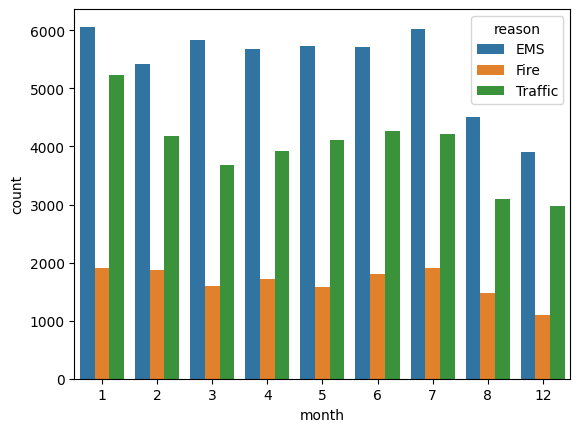

In [34]:
sns.countplot(x='month', data=df, hue='reason')

This plot is missing some months. This is because of missing data in some columns as seen below (zip).

In [40]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


We simply assume that if we had the lattitude (lat) column, the call actually took place.

<Axes: xlabel='month'>

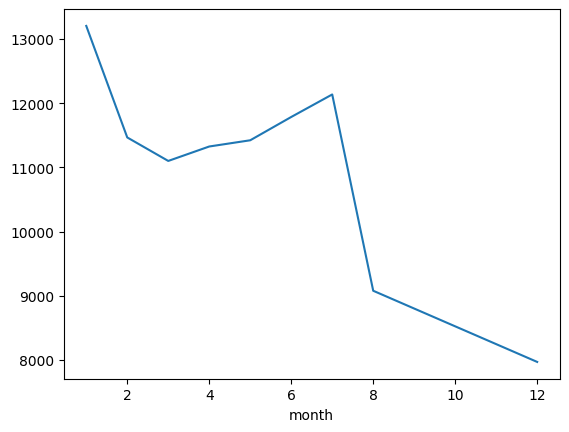

In [41]:
byMonth['lat'].plot()

Using seaborn's lmplot() to create a linear fit on the number of calls per month. Since month is not actually a column in byMonth, we need to reset the index to a column.

In [48]:
byMonth.reset_index()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


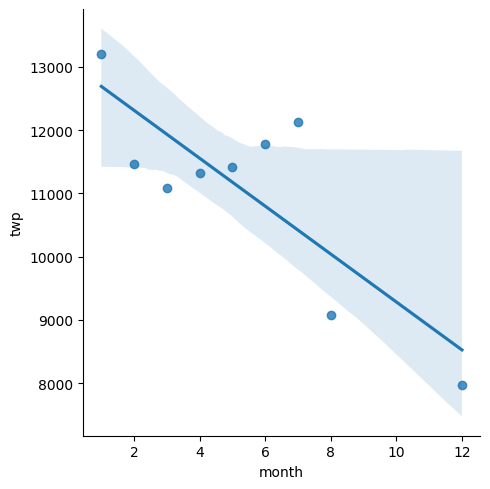

In [47]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

Now, we create a new column called 'Date' that contains the date from the timeStamp column.

In [49]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Now, we groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

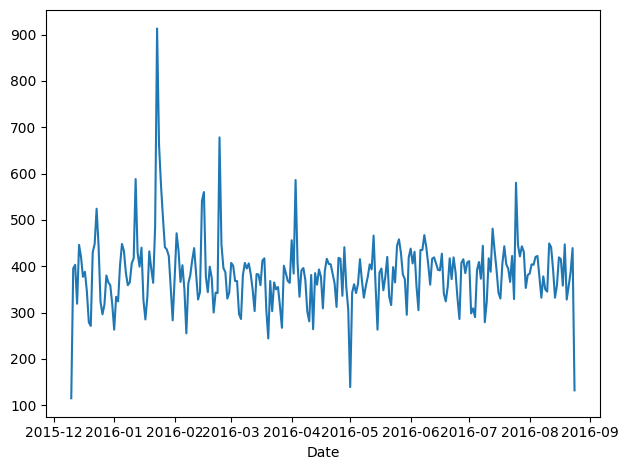

In [50]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Now, we create 3 separate plots with each plot representing a reason for the 911 call

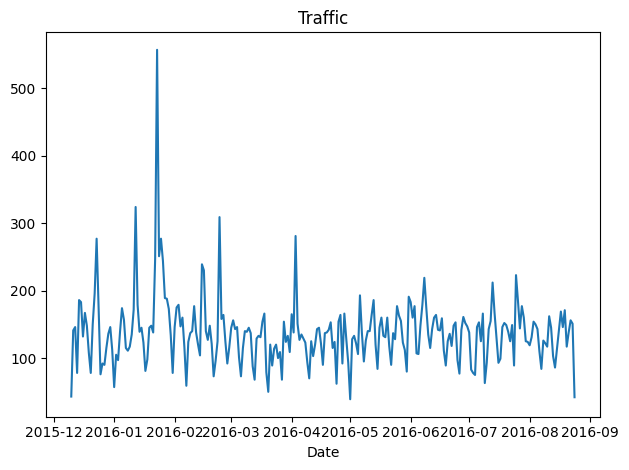

In [52]:
df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

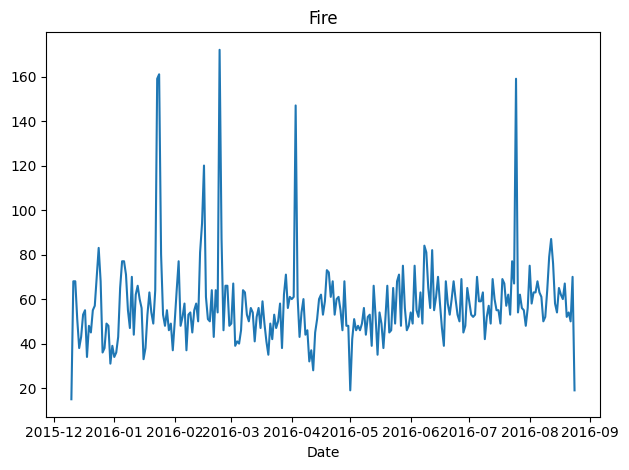

In [53]:
df[df['reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

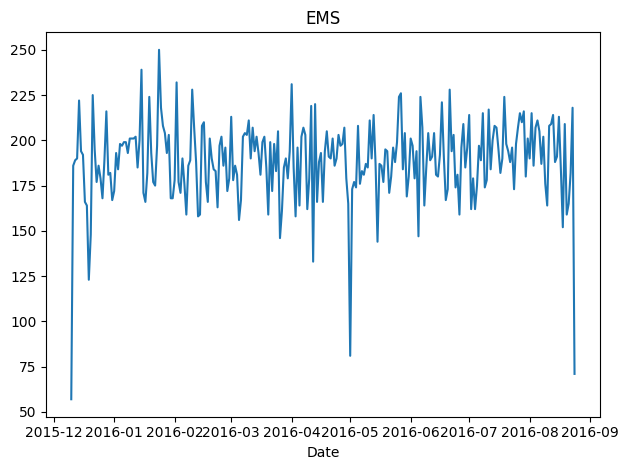

In [54]:
df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an **unstack** method.

In [56]:
dayHour = df.groupby(by=['day of week','hour']).count()['reason'].unstack()
dayHour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='hour', ylabel='day of week'>

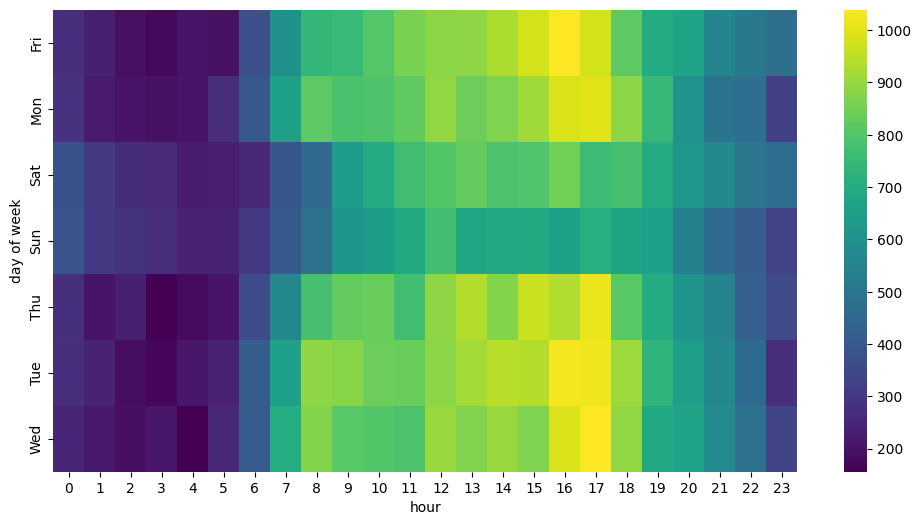

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

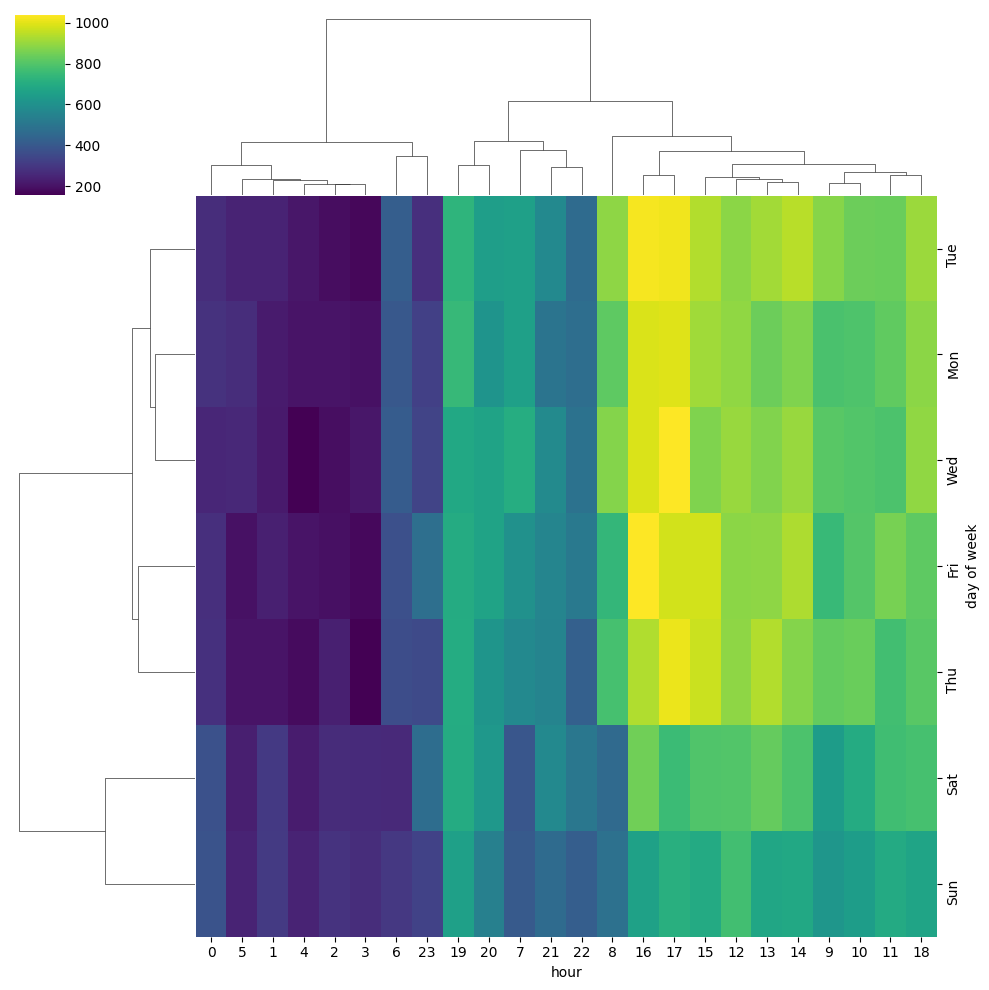

In [58]:
sns.clustermap(dayHour,cmap='viridis')

Doing the same for dayMonth

In [60]:
dayMonth = df.groupby(by=['day of week','month']).count()['reason'].unstack()
dayMonth.head()

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='month', ylabel='day of week'>

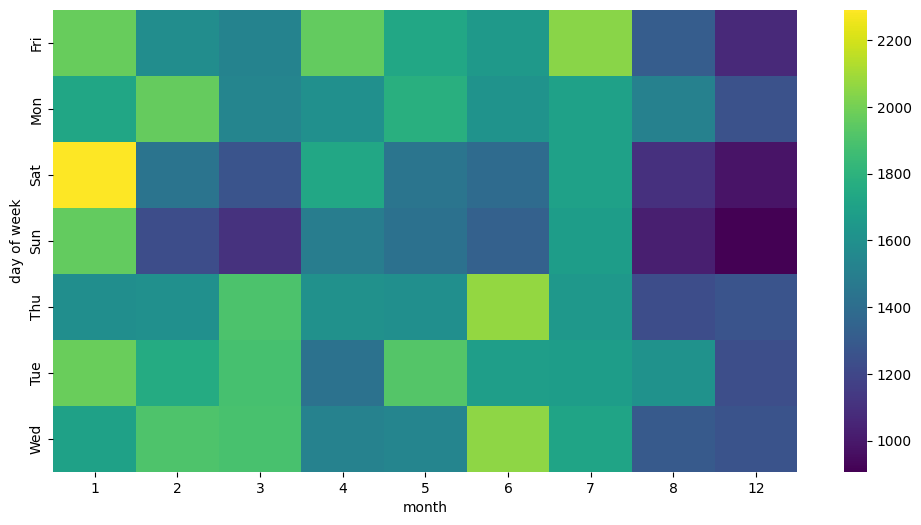

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

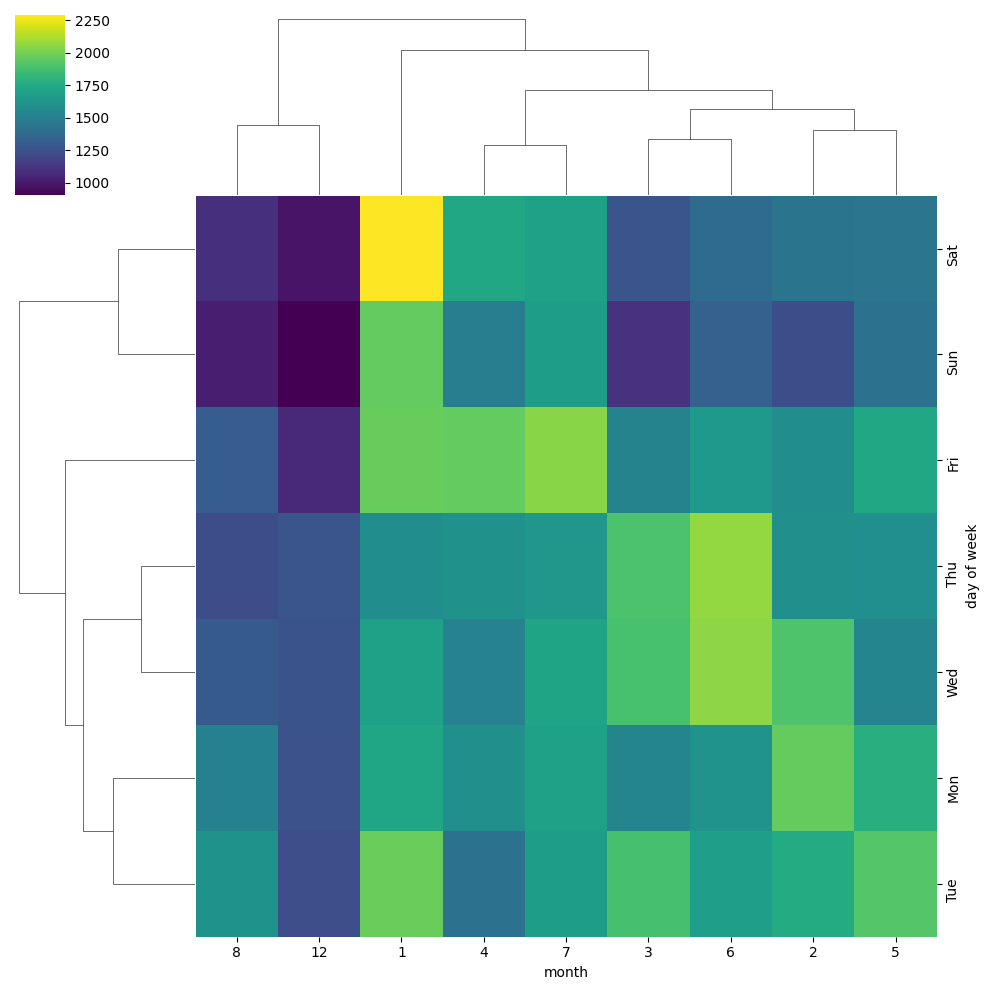

In [62]:
sns.clustermap(dayMonth,cmap='viridis')